In [1]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

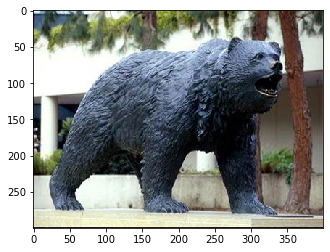

In [2]:
%matplotlib inline
pil_im = Image.open('UCLA_Bruin.jpg', 'r')
im_rgb = np.asarray(pil_im)
imshow(im_rgb)

In [3]:
def kmeans_alg(img_in,mu1,K=1,iter_num=10):
    x = img_in.astype(float)
    h_size = x.shape[0]
    w_size = x.shape[1]
    mu_list = []
    mu_list.append(mu1)
    for k in range(K-1):
        dstr = 0
        i_opt = 0
        j_opt = 0
        for i in range(h_size):
            for j in range(w_size):
                dij = []
                for m in range(len(mu_list)):
                    dij.append(np.linalg.norm((x[i][j] - mu_list[m])))
                    
                dij_min = min(dij)
                if (dij_min>dstr):
                    i_opt = i
                    j_opt = j
                    dstr = dij_min
        mu_list.append(x[i_opt][j_opt])
        
    mu_k = np.array(mu_list)
    J = np.zeros(iter_num,dtype=float)
    for it in range(iter_num):
        N_k = np.zeros((K,1),dtype=float)
        xsum_k = np.zeros((K,3),dtype=float)
        xidx_k = np.zeros((x.shape[0],x.shape[1]),dtype=int)
        for i in range(h_size):
            for j in range(w_size):
                dij = []
                for m in range(len(mu_k)):
                    dij.append(np.linalg.norm((x[i][j]-mu_k[m])))
                ik = dij.index(min(dij))
                N_k[ik] = N_k[ik]+1.0
                xsum_k[ik] = xsum_k[ik]+x[i][j]
                xidx_k[i][j] = ik
        mu_k = xsum_k/N_k
        for i in range(h_size):
            for j in range(w_size):
                ik = xidx_k[i][j]
                dij = np.linalg.norm((x[i][j]-mu_k[ik]))
                J[it] = J[it] + (dij**2)
                
    y = np.zeros(x.shape,dtype=float)
    for i in range(h_size):
        for j in range(w_size):
            ik = xidx_k[i][j]
            y[i][j] = mu_k[ik]
            
    img_out = y.astype(np.uint8)
    return img_out,J
    
def J_plot(Jin,K):
    x = np.arange(1,(len(Jin)+1))
    plt.plot(x,Jin)
    plt.xlabel('Iteration Number')
    plt.ylabel('J')
    title_name = 'J(' + str(len(Jin)) + ') = ' + str(int(Jin[-1])) + ' for K = ' + str(K)
    plt.title(title_name)
    plt.grid(True)
    fig = plt.gcf()
    fig.set_size_inches(7, 5)
    plt.show()      
    

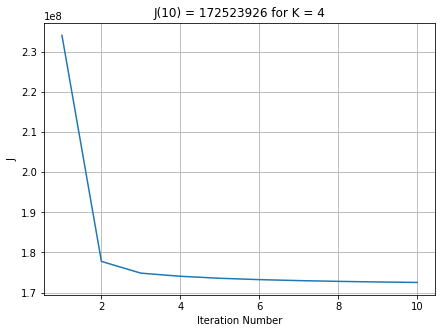

In [4]:
# K = 4
Kval1 = 4
iterations = 10
mu1_val = np.array([229,249,250],dtype=float)
output_img1, J_out1 = kmeans_alg(im_rgb,mu1_val,Kval1,iterations)
J_plot(J_out1,Kval1)

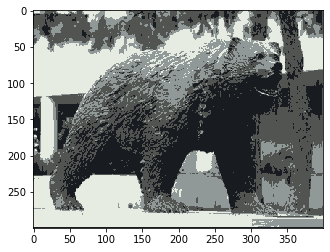

In [5]:
# K = 4
imshow(output_img1)

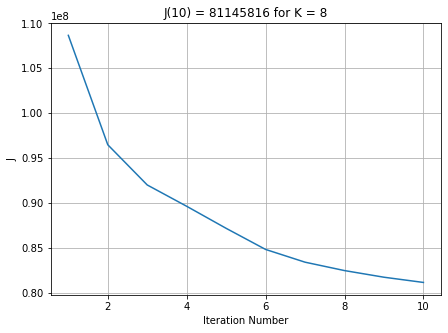

In [6]:
# K = 8
Kval2 = 8
output_img2, J_out2 = kmeans_alg(im_rgb,mu1_val,Kval2,iterations)
J_plot(J_out2,Kval2)

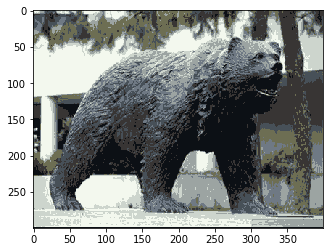

In [7]:
# K = 8
imshow(output_img2)

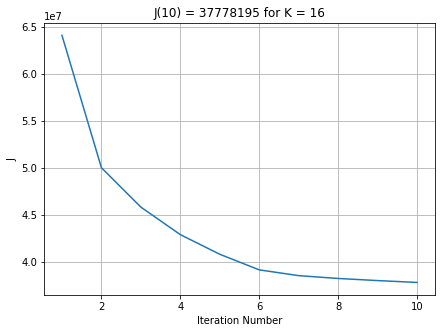

In [8]:
# K = 16
Kval3 = 16
output_img3, J_out3 = kmeans_alg(im_rgb,mu1_val,Kval3,iterations)
J_plot(J_out3,Kval3)

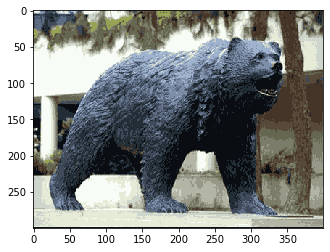

In [9]:
# K = 16
imshow(output_img3)